Variance of group 1: 20.25028923414129
Variance of group 2: 86.69513027997485
F statistic: 0.233580469499782
Critical F value (alpha=0.05): 1.8608114354760754


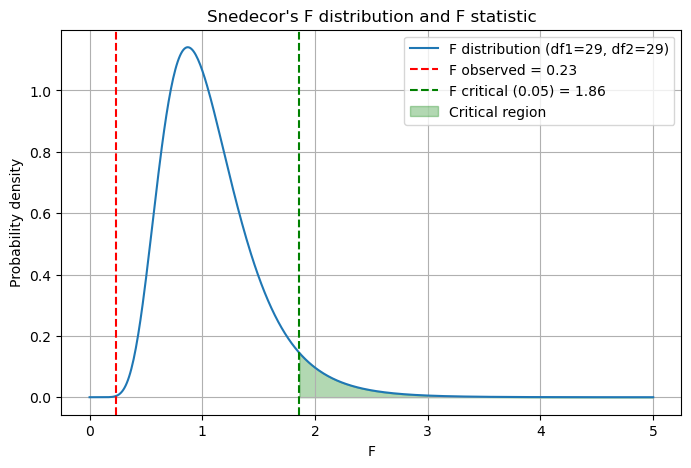

In [7]:
# The Snedecor's distribution is useful in VARIANCE studies of TWO groups.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# 1. Generate example data
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=30)  # mean=50, std=5
group2 = np.random.normal(loc=50, scale=10, size=30) # mean=50, std=10

# 2. Calculate variances and F statistic
var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)
F_stat = var1 / var2

df1 = len(group1) - 1  # degrees of freedom for group 1
df2 = len(group2) - 1  # degrees of freedom for group 2

print("Variance of group 1:", var1)
print("Variance of group 2:", var2)
print("F statistic:", F_stat)

# 3. F distribution (Snedecor's F)
x = np.linspace(0, 5, 500)
y = f.pdf(x, df1, df2)

# 4. Critical value for alpha=0.05
alpha = 0.05
F_crit = f.ppf(1 - alpha, df1, df2)
print("Critical F value (alpha=0.05):", F_crit)

# 5. Visualization
plt.figure(figsize=(8,5))
plt.plot(x, y, label=f"F distribution (df1={df1}, df2={df2})")
plt.axvline(F_stat, color='red', linestyle='--', label=f"F observed = {F_stat:.2f}")
plt.axvline(F_crit, color='green', linestyle='--', label=f"F critical (0.05) = {F_crit:.2f}")

x_fill = np.linspace(F_crit, max(x), 200)
plt.fill_between(x_fill, f.pdf(x_fill, df1, df2), color='green', alpha=0.3, label="Critical region")

plt.title("Snedecor's F distribution and F statistic")
plt.xlabel("F")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True)
plt.show()